## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 1.0005247	total: 58.7ms	remaining: 58.7s
1:	learn: 0.9795927	total: 59.7ms	remaining: 29.8s
2:	learn: 0.9591347	total: 60.7ms	remaining: 20.2s
3:	learn: 0.9429468	total: 61.7ms	remaining: 15.4s
4:	learn: 0.9261755	total: 62.7ms	remaining: 12.5s
5:	learn: 0.9087872	total: 63.8ms	remaining: 10.6s
6:	learn: 0.8927219	total: 64.7ms	remaining: 9.18s
7:	learn: 0.8770980	total: 65.6ms	remaining: 8.14s
8:	learn: 0.8610781	total: 66.5ms	remaining: 7.32s
9:	learn: 0.8448448	total: 67.4ms	remaining: 6.67s
10:	learn: 0.8315396	total: 68.3ms	remaining: 6.14s
11:	learn: 0.8175196	total: 69ms	remaining: 5.68s
12:	learn: 0.8024972	total: 69.8ms	remaining: 5.3s
13:	learn: 0.7872545	total: 70.6ms	remaining: 4.97s
14:	learn: 0.7742508	total: 71.4ms	remaining: 4.69s
15:	learn: 0.7599227	total: 72.2ms	remaining: 4.44s
16:	learn: 0.7468316	total: 73.1ms	remaining: 4.23s
17:	learn: 0.7353030	total: 74ms	remaining: 4.03s
18:	learn: 0.7235286	total: 74.8ms	remaining: 3.8

59:	learn: 0.4306270	total: 108ms	remaining: 1.7s
60:	learn: 0.4253332	total: 109ms	remaining: 1.68s
61:	learn: 0.4207301	total: 110ms	remaining: 1.67s
62:	learn: 0.4175643	total: 111ms	remaining: 1.65s
63:	learn: 0.4133060	total: 112ms	remaining: 1.64s
64:	learn: 0.4092080	total: 113ms	remaining: 1.62s
65:	learn: 0.4062491	total: 113ms	remaining: 1.6s
66:	learn: 0.4023296	total: 114ms	remaining: 1.59s
67:	learn: 0.3987819	total: 115ms	remaining: 1.58s
68:	learn: 0.3956114	total: 116ms	remaining: 1.56s
69:	learn: 0.3931735	total: 117ms	remaining: 1.55s
70:	learn: 0.3902442	total: 117ms	remaining: 1.54s
71:	learn: 0.3879540	total: 118ms	remaining: 1.52s
72:	learn: 0.3844222	total: 119ms	remaining: 1.51s
73:	learn: 0.3805764	total: 120ms	remaining: 1.5s
74:	learn: 0.3775834	total: 121ms	remaining: 1.49s
75:	learn: 0.3748866	total: 121ms	remaining: 1.48s
76:	learn: 0.3713086	total: 122ms	remaining: 1.47s
77:	learn: 0.3688906	total: 123ms	remaining: 1.46s
78:	learn: 0.3653922	total: 124ms	

160:	learn: 0.2476256	total: 191ms	remaining: 998ms
161:	learn: 0.2466693	total: 192ms	remaining: 995ms
162:	learn: 0.2456310	total: 193ms	remaining: 992ms
163:	learn: 0.2447662	total: 194ms	remaining: 989ms
164:	learn: 0.2439036	total: 195ms	remaining: 986ms
165:	learn: 0.2433782	total: 196ms	remaining: 983ms
166:	learn: 0.2426582	total: 196ms	remaining: 980ms
167:	learn: 0.2418975	total: 197ms	remaining: 977ms
168:	learn: 0.2415046	total: 198ms	remaining: 974ms
169:	learn: 0.2408313	total: 199ms	remaining: 971ms
170:	learn: 0.2400192	total: 200ms	remaining: 968ms
171:	learn: 0.2390668	total: 201ms	remaining: 966ms
172:	learn: 0.2384049	total: 201ms	remaining: 963ms
173:	learn: 0.2376971	total: 202ms	remaining: 960ms
174:	learn: 0.2369577	total: 203ms	remaining: 958ms
175:	learn: 0.2363953	total: 204ms	remaining: 956ms
176:	learn: 0.2359021	total: 205ms	remaining: 954ms
177:	learn: 0.2351189	total: 206ms	remaining: 951ms
178:	learn: 0.2345831	total: 207ms	remaining: 949ms
179:	learn: 

286:	learn: 0.1791166	total: 298ms	remaining: 741ms
287:	learn: 0.1790264	total: 299ms	remaining: 740ms
288:	learn: 0.1788724	total: 300ms	remaining: 738ms
289:	learn: 0.1784176	total: 301ms	remaining: 736ms
290:	learn: 0.1780141	total: 302ms	remaining: 735ms
291:	learn: 0.1777076	total: 303ms	remaining: 734ms
292:	learn: 0.1770925	total: 303ms	remaining: 732ms
293:	learn: 0.1768039	total: 304ms	remaining: 731ms
294:	learn: 0.1765048	total: 305ms	remaining: 729ms
295:	learn: 0.1763139	total: 306ms	remaining: 728ms
296:	learn: 0.1761670	total: 307ms	remaining: 727ms
297:	learn: 0.1755523	total: 308ms	remaining: 725ms
298:	learn: 0.1754641	total: 308ms	remaining: 723ms
299:	learn: 0.1749935	total: 309ms	remaining: 721ms
300:	learn: 0.1748467	total: 310ms	remaining: 720ms
301:	learn: 0.1744130	total: 311ms	remaining: 718ms
302:	learn: 0.1738543	total: 312ms	remaining: 717ms
303:	learn: 0.1734314	total: 312ms	remaining: 715ms
304:	learn: 0.1733318	total: 313ms	remaining: 714ms
305:	learn: 

386:	learn: 0.1467319	total: 382ms	remaining: 604ms
387:	learn: 0.1464510	total: 382ms	remaining: 603ms
388:	learn: 0.1462320	total: 383ms	remaining: 602ms
389:	learn: 0.1457906	total: 384ms	remaining: 601ms
390:	learn: 0.1453595	total: 385ms	remaining: 599ms
391:	learn: 0.1450877	total: 386ms	remaining: 598ms
392:	learn: 0.1450206	total: 387ms	remaining: 597ms
393:	learn: 0.1446160	total: 388ms	remaining: 596ms
394:	learn: 0.1442079	total: 388ms	remaining: 595ms
395:	learn: 0.1438772	total: 389ms	remaining: 594ms
396:	learn: 0.1435294	total: 390ms	remaining: 592ms
397:	learn: 0.1431549	total: 391ms	remaining: 591ms
398:	learn: 0.1430065	total: 392ms	remaining: 590ms
399:	learn: 0.1429249	total: 392ms	remaining: 589ms
400:	learn: 0.1426837	total: 393ms	remaining: 587ms
401:	learn: 0.1425164	total: 394ms	remaining: 586ms
402:	learn: 0.1421888	total: 395ms	remaining: 585ms
403:	learn: 0.1421015	total: 396ms	remaining: 584ms
404:	learn: 0.1420221	total: 396ms	remaining: 582ms
405:	learn: 

514:	learn: 0.1161835	total: 488ms	remaining: 460ms
515:	learn: 0.1159230	total: 489ms	remaining: 459ms
516:	learn: 0.1157708	total: 490ms	remaining: 458ms
517:	learn: 0.1153802	total: 491ms	remaining: 457ms
518:	learn: 0.1151304	total: 492ms	remaining: 456ms
519:	learn: 0.1149393	total: 493ms	remaining: 455ms
520:	learn: 0.1147534	total: 494ms	remaining: 454ms
521:	learn: 0.1147246	total: 495ms	remaining: 453ms
522:	learn: 0.1146988	total: 496ms	remaining: 452ms
523:	learn: 0.1144966	total: 497ms	remaining: 451ms
524:	learn: 0.1144533	total: 497ms	remaining: 450ms
525:	learn: 0.1142566	total: 498ms	remaining: 449ms
526:	learn: 0.1141103	total: 499ms	remaining: 448ms
527:	learn: 0.1140539	total: 500ms	remaining: 447ms
528:	learn: 0.1138627	total: 501ms	remaining: 446ms
529:	learn: 0.1136801	total: 501ms	remaining: 445ms
530:	learn: 0.1135240	total: 502ms	remaining: 444ms
531:	learn: 0.1131845	total: 503ms	remaining: 443ms
532:	learn: 0.1129895	total: 504ms	remaining: 442ms
533:	learn: 

613:	learn: 0.0994497	total: 572ms	remaining: 359ms
614:	learn: 0.0992522	total: 573ms	remaining: 358ms
615:	learn: 0.0991244	total: 573ms	remaining: 357ms
616:	learn: 0.0988730	total: 574ms	remaining: 356ms
617:	learn: 0.0986057	total: 575ms	remaining: 355ms
618:	learn: 0.0985052	total: 576ms	remaining: 355ms
619:	learn: 0.0983340	total: 577ms	remaining: 353ms
620:	learn: 0.0981274	total: 578ms	remaining: 352ms
621:	learn: 0.0979520	total: 578ms	remaining: 351ms
622:	learn: 0.0978265	total: 579ms	remaining: 350ms
623:	learn: 0.0977732	total: 580ms	remaining: 349ms
624:	learn: 0.0976345	total: 581ms	remaining: 348ms
625:	learn: 0.0975207	total: 582ms	remaining: 347ms
626:	learn: 0.0974147	total: 583ms	remaining: 347ms
627:	learn: 0.0972044	total: 583ms	remaining: 345ms
628:	learn: 0.0969981	total: 584ms	remaining: 345ms
629:	learn: 0.0968100	total: 585ms	remaining: 344ms
630:	learn: 0.0965478	total: 586ms	remaining: 343ms
631:	learn: 0.0965088	total: 586ms	remaining: 341ms
632:	learn: 

741:	learn: 0.0810774	total: 678ms	remaining: 236ms
742:	learn: 0.0809955	total: 679ms	remaining: 235ms
743:	learn: 0.0808867	total: 680ms	remaining: 234ms
744:	learn: 0.0808782	total: 681ms	remaining: 233ms
745:	learn: 0.0807313	total: 682ms	remaining: 232ms
746:	learn: 0.0806276	total: 683ms	remaining: 231ms
747:	learn: 0.0804773	total: 684ms	remaining: 230ms
748:	learn: 0.0803426	total: 684ms	remaining: 229ms
749:	learn: 0.0801351	total: 685ms	remaining: 228ms
750:	learn: 0.0799962	total: 686ms	remaining: 227ms
751:	learn: 0.0798511	total: 687ms	remaining: 226ms
752:	learn: 0.0798378	total: 687ms	remaining: 225ms
753:	learn: 0.0797240	total: 688ms	remaining: 225ms
754:	learn: 0.0796667	total: 689ms	remaining: 224ms
755:	learn: 0.0794697	total: 690ms	remaining: 223ms
756:	learn: 0.0793407	total: 691ms	remaining: 222ms
757:	learn: 0.0792505	total: 692ms	remaining: 221ms
758:	learn: 0.0791419	total: 692ms	remaining: 220ms
759:	learn: 0.0789560	total: 693ms	remaining: 219ms
760:	learn: 

841:	learn: 0.0704685	total: 762ms	remaining: 143ms
842:	learn: 0.0704448	total: 763ms	remaining: 142ms
843:	learn: 0.0703418	total: 764ms	remaining: 141ms
844:	learn: 0.0702342	total: 764ms	remaining: 140ms
845:	learn: 0.0701405	total: 765ms	remaining: 139ms
846:	learn: 0.0701270	total: 766ms	remaining: 138ms
847:	learn: 0.0699247	total: 767ms	remaining: 137ms
848:	learn: 0.0698401	total: 768ms	remaining: 137ms
849:	learn: 0.0696486	total: 769ms	remaining: 136ms
850:	learn: 0.0696342	total: 769ms	remaining: 135ms
851:	learn: 0.0694818	total: 770ms	remaining: 134ms
852:	learn: 0.0694011	total: 771ms	remaining: 133ms
853:	learn: 0.0693191	total: 772ms	remaining: 132ms
854:	learn: 0.0692662	total: 773ms	remaining: 131ms
855:	learn: 0.0692036	total: 773ms	remaining: 130ms
856:	learn: 0.0690615	total: 774ms	remaining: 129ms
857:	learn: 0.0689931	total: 775ms	remaining: 128ms
858:	learn: 0.0689627	total: 776ms	remaining: 127ms
859:	learn: 0.0688448	total: 777ms	remaining: 126ms
860:	learn: 

967:	learn: 0.0596222	total: 870ms	remaining: 28.8ms
968:	learn: 0.0595579	total: 871ms	remaining: 27.9ms
969:	learn: 0.0594380	total: 872ms	remaining: 27ms
970:	learn: 0.0592879	total: 872ms	remaining: 26.1ms
971:	learn: 0.0592071	total: 873ms	remaining: 25.2ms
972:	learn: 0.0591045	total: 874ms	remaining: 24.3ms
973:	learn: 0.0590537	total: 875ms	remaining: 23.4ms
974:	learn: 0.0589719	total: 876ms	remaining: 22.5ms
975:	learn: 0.0588847	total: 876ms	remaining: 21.5ms
976:	learn: 0.0587773	total: 877ms	remaining: 20.7ms
977:	learn: 0.0586327	total: 878ms	remaining: 19.8ms
978:	learn: 0.0585690	total: 879ms	remaining: 18.9ms
979:	learn: 0.0584327	total: 880ms	remaining: 18ms
980:	learn: 0.0584210	total: 881ms	remaining: 17.1ms
981:	learn: 0.0583275	total: 881ms	remaining: 16.2ms
982:	learn: 0.0581398	total: 882ms	remaining: 15.3ms
983:	learn: 0.0580404	total: 883ms	remaining: 14.4ms
984:	learn: 0.0580300	total: 884ms	remaining: 13.5ms
985:	learn: 0.0579691	total: 885ms	remaining: 12.6

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

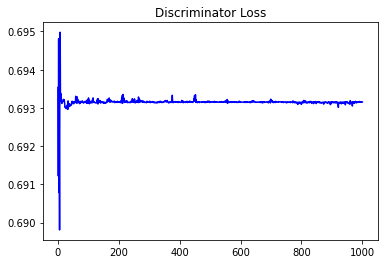

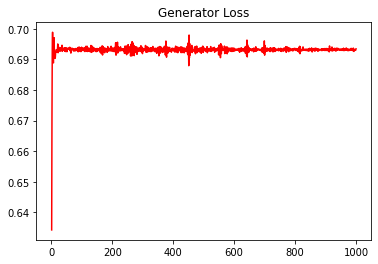

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.07048129985551851


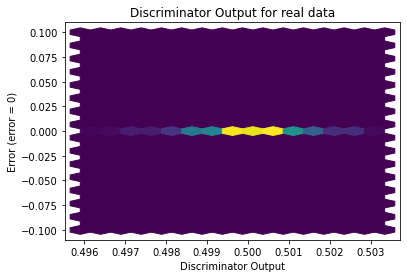

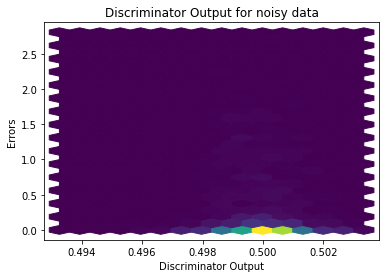

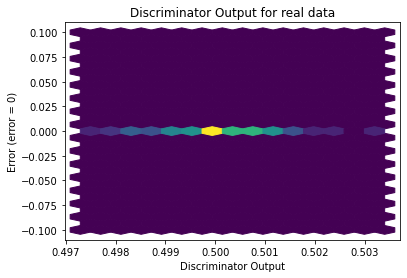

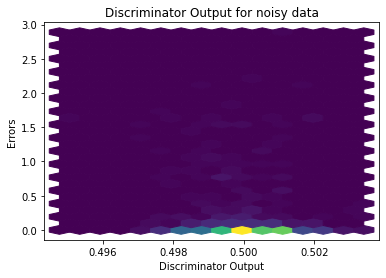

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


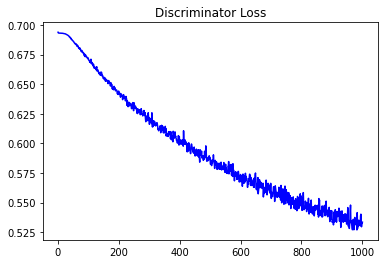

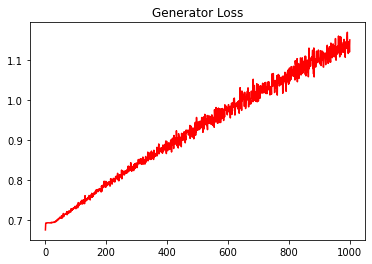

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.08698271370910315


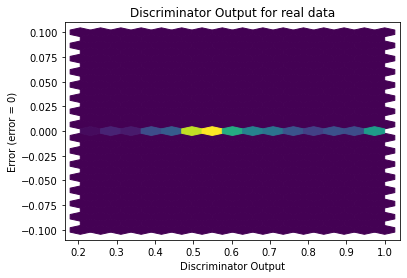

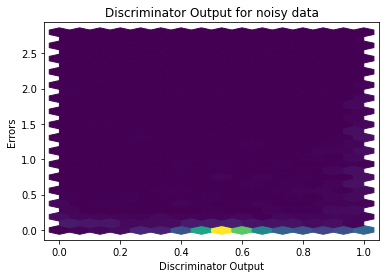

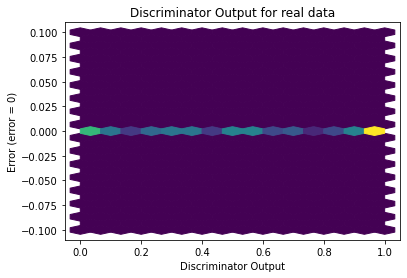

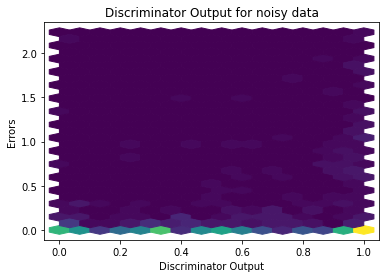

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
